<a href="https://colab.research.google.com/github/Likelipop/See_image_processing/blob/main/Lab_03/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up lib

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import gdown

#Dowload IMG

In [2]:
!git clone "https://github.com/Likelipop/See_image_processing.git"

Cloning into 'See_image_processing'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 55 (delta 13), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (55/55), 9.38 MiB | 13.01 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [5]:
%cd "/content/See_image_processing/Lab_03"

/content/See_image_processing/Lab_03


#Get IMG path

In [13]:
bliss = 'Images/bliss.jpg'
hall = 'Images/hall.jpg'

# Convert original IMG to noise_IMG

**Impulse noise**

In [14]:
#salt & peper
def add_impulse_noise (image, prob):
  noisy_img = image.copy()

  random_matrix = np.random.rand(*image.shape[:2])

  noisy_img[random_matrix < prob/2] = 255
  noisy_img[random_matrix > 1 - prob/2] = 0

  return noisy_img

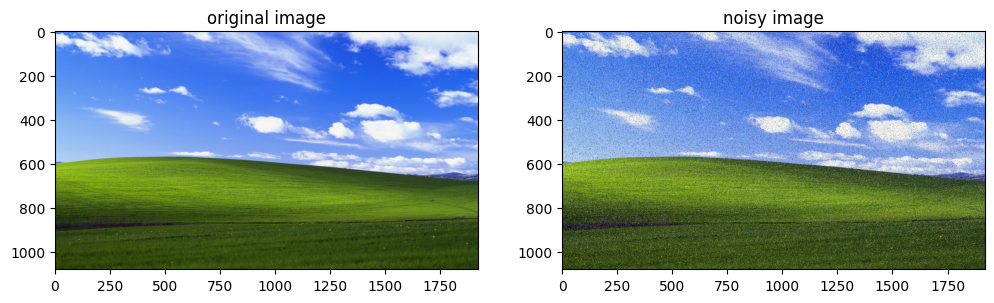

In [17]:
bliss_img = cv.imread(bliss)
noisy_image = add_impulse_noise(bliss_img, prob=0.1)
cv.imwrite('output_impulse_noise.jpg', noisy_image)


#plot image
plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(bliss_img, cv.COLOR_BGR2RGB))
plt.title ('original image')
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB))
plt.title ('noisy image')
plt.show()


**Gaussian noise**

In [ ]:
def add_gaussian_noise(image, mean, sigma):
    """
    Adds Gaussian noise to an image.

    Args:
    - image: Input image (numpy array).
    - mean: Mean of the Gaussian distribution (default is 0).
    - sigma: Standard deviation of the Gaussian distribution (controls noise intensity).

    Returns:
    - noisy_img: Image with added Gaussian noise.
    """
    # Generate Gaussian noise
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)

    # Add the Gaussian noise to the image
    noisy_img = image.astype(np.float32) + gaussian_noise

    # Clip pixel values to be in the valid range [0, 255]
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

    return noisy_img

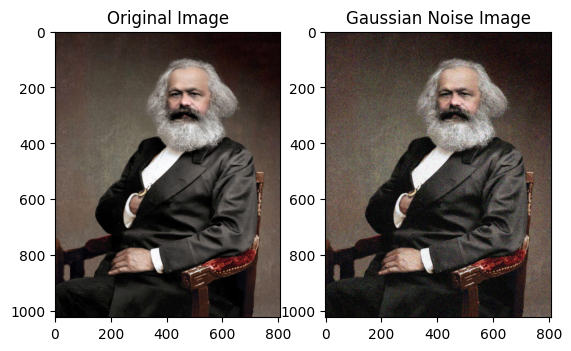

In [ ]:
input_img = cv.imread(imgKarlMax_path)
if input_img is not None:
    # Add impulse noise to the image
    noisy_image = add_gaussian_noise(input_img,0,25)

    # Save the resulting noisy image
    cv.imwrite('output_gaussian_noise.jpg', noisy_image)

    # Display the original and noisy images using matplotlib
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB))
    plt.title('Gaussian Noise Image')
    plt.show()
else:
    print("Unable to read the image from the provided path.")

**Speckle noise**

In [ ]:


def add_speckle_noise(image, sigma):
    """
    Adds speckle noise to an image.

    Args:
    - image: Input image (numpy array).
    - sigma: Standard deviation of the speckle noise (controls noise intensity).

    Returns:
    - noisy_img: Image with added speckle noise.
    """
    # Convert the image to float32 for accurate calculations
    image = image.astype(np.float32) / 255.0

    # Generate speckle noise (multiplicative noise)
    noise = np.random.randn(*image.shape) * sigma

    # Add the speckle noise to the image
    noisy_img = image + image * noise

    # Clip pixel values to the range [0, 1] and convert back to uint8
    noisy_img = np.clip(noisy_img, 0, 1)
    noisy_img = (noisy_img * 255).astype(np.uint8)

    return noisy_img




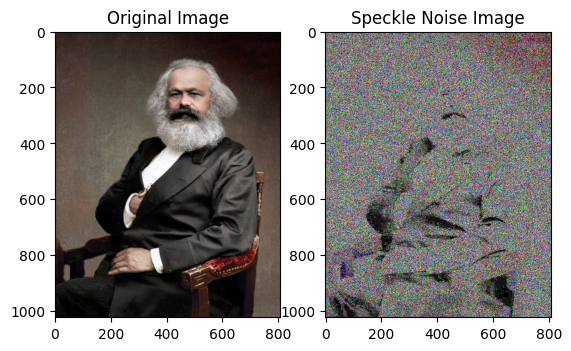

In [ ]:
input_img = cv.imread(imgKarlMax_path)
if input_img is not None:
    # Add impulse noise to the image
    noisy_image = add_speckle_noise(input_img,50)

    # Save the resulting noisy image
    cv.imwrite('output_speckle_noise.jpg', noisy_image)

    # Display the original and noisy images using matplotlib
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB))
    plt.title('Speckle Noise Image')
    plt.show()
else:
    print("Unable to read the image from the provided path.")

In [ ]:
1/(b-a)

**Uniform Noise**

In [ ]:
def add_uniform_noise(img, noise_range):
    """
    Thêm nhiễu uniform vào ảnh đầu vào.

    Parameters:
        img (numpy.ndarray): Ảnh gốc (dạng mảng NumPy).
        noise_range (tuple): Khoảng giá trị nhiễu (min, max), thường nằm trong khoảng [-1, 1] nếu ảnh được chuẩn hóa.

    Returns:
        numpy.ndarray: Ảnh sau khi thêm nhiễu.
    """
    # Kiểm tra nếu ảnh có giá trị pixel từ 0 đến 255 thì chuẩn hóa về [0, 1]
    if img.dtype == np.uint8:
        img = img / 255.0

    # Tạo nhiễu uniform cùng kích thước với ảnh
    noise = np.random.uniform(low=noise_range[0], high=noise_range[1], size=img.shape)

    # Thêm nhiễu vào ảnh
    noisy_img = img + noise

    # Đảm bảo giá trị pixel nằm trong khoảng [0, 1]
    noisy_img = np.clip(noisy_img, 0, 1)

    # Chuyển ảnh về dạng uint8 nếu cần
    noisy_img = (noisy_img * 255).astype(np.uint8)

    return noisy_img


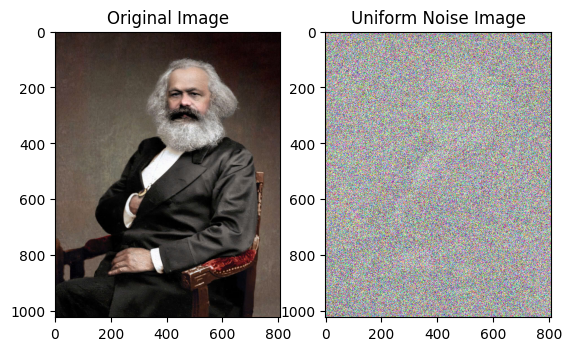

In [ ]:
input_img = cv.imread(imgKarlMax_path)
if input_img is not None:
    # Add impulse noise to the image
    noisy_image = add_uniform_noise(input_img,(-5, 10))

    # Save the resulting noisy image
    cv.imwrite('output_uniform_noise.jpg', noisy_image)

    # Display the original and noisy images using matplotlib
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB))
    plt.title('Uniform Noise Image')
    plt.show()
else:
    print("Unable to read the image from the provided path.")

# Filter

**Harmonic mean filter**

In [ ]:
def harmonic_mean_filter(noisy_image, kernel_size):
    """
    Apply Harmonic Mean Filter to denoise an image channel-wise.

    Parameters:
    noisy_image (numpy array): Input noisy image (color).
    kernel_size (int): Size of the filter kernel. Default is 3.

    Returns:
    numpy array: Denoised color image.
    """
    # Initialize the output image with the same shape as the input
    denoised_image = np.zeros_like(noisy_image, dtype=np.float32)

    # Process each color channel separately
    for c in range(3):  # Loop over B, G, R channels
        # Padding to handle borders for each channel
        pad_size = kernel_size // 2
        padded_channel = cv.copyMakeBorder(noisy_image[:, :, c], pad_size, pad_size, pad_size, pad_size, cv.BORDER_REFLECT)

        # Traverse each pixel in the channel
        for i in range(pad_size, padded_channel.shape[0] - pad_size):
            for j in range(pad_size, padded_channel.shape[1] - pad_size):
                # Extract the local neighborhood (kernel window) for the current channel
                local_region = padded_channel[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]

                # Calculate harmonic mean in the kernel region, avoiding zero values to prevent division errors
                local_region = local_region.astype(np.float32)
                harmonic_mean = kernel_size * kernel_size / np.sum(1.0 / (local_region + 1e-10))

                # Assign the harmonic mean to the output image's channel
                denoised_image[i - pad_size, j - pad_size, c] = harmonic_mean

    # Convert the image back to 8-bit format
    denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)

    return denoised_image




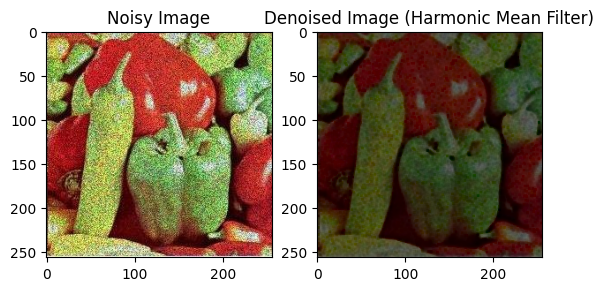

In [ ]:
# Load the noisy color image
noisy_image = cv.imread(imgNoiseFruit_path)

# Apply Harmonic Mean Filter on the color image
denoised_image = harmonic_mean_filter(noisy_image, kernel_size=2)

# Display the original noisy and denoised images
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoised_image, cv.COLOR_BGR2RGB))
plt.title('Denoised Image (Harmonic Mean Filter)')
plt.show()

**Geometric mean filter**

In [ ]:
def geometric_mean_filter(noisy_image, kernel_size):
    """
    Apply Geometric Mean Filter to denoise an image channel-wise.

    Parameters:
    noisy_image (numpy array): Input noisy image (color).
    kernel_size (int): Size of the filter kernel. Default is 3.

    Returns:
    numpy array: Denoised color image.
    """
    # Initialize the output image with the same shape as the input
    denoised_image = np.zeros_like(noisy_image, dtype=np.float32)

    # Process each color channel separately
    for c in range(3):  # Loop over B, G, R channels
        # Padding to handle borders for each channel
        pad_size = kernel_size // 2
        padded_channel = cv.copyMakeBorder(noisy_image[:, :, c], pad_size, pad_size, pad_size, pad_size, cv.BORDER_REFLECT)

        # Traverse each pixel in the channel
        for i in range(pad_size, padded_channel.shape[0] - pad_size):
            for j in range(pad_size, padded_channel.shape[1] - pad_size):
                # Extract the local neighborhood (kernel window) for the current channel
                local_region = padded_channel[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]

                # Calculate geometric mean, avoiding zero values with a small epsilon
                local_region = local_region.astype(np.float32) + 1e-10
                geometric_mean = np.exp(np.sum(np.log(local_region)) / (kernel_size * kernel_size))

                # Assign the geometric mean to the output image's channel
                denoised_image[i - pad_size, j - pad_size, c] = geometric_mean

    # Convert the image back to 8-bit format
    denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)

    return denoised_image




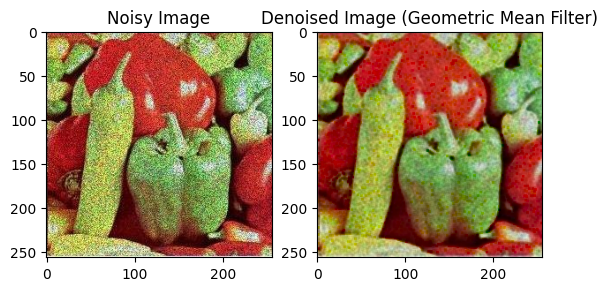

In [ ]:
# Load the noisy color image
noisy_image = cv.imread(imgNoiseFruit_path)

# Apply Geometric Mean Filter on the color image
denoised_image = geometric_mean_filter(noisy_image, kernel_size=3)

# Display the original noisy and denoised images
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoised_image, cv.COLOR_BGR2RGB))
plt.title('Denoised Image (Geometric Mean Filter)')
plt.show()

**Convolution filter**

In [ ]:
def apply_convolution_filter(image, kernel):
    """
    Apply a convolution filter to an image.

    Parameters:
    image (numpy array): Input color image.
    kernel (numpy array): Convolution kernel (filter) to apply.

    Returns:
    numpy array: Filtered color image.
    """
    # Apply the convolution filter to each color channel
    filtered_image = np.zeros_like(image)
    for c in range(3):  # Loop over B, G, R channels
        filtered_image[:, :, c] = cv.filter2D(image[:, :, c], -1, kernel)
    return filtered_image



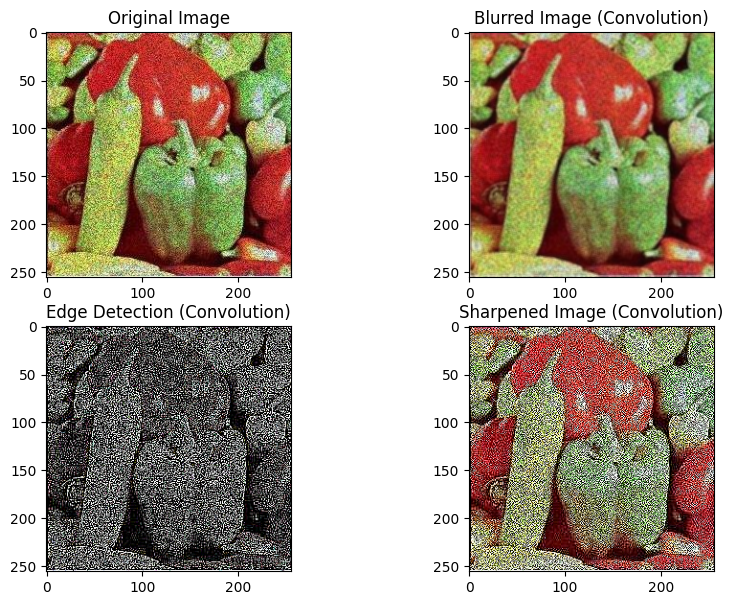

In [ ]:
# Load the input noise image
noisy_image = cv.imread(imgNoiseFruit_path)

# Define different kernels for various effects
# Blur kernel (averaging filter)
blur_kernel = np.ones((3, 3), np.float32) / 9

# Edge detection kernel (Sobel)
edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]], np.float32)

# Sharpen kernel
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]], np.float32)

# Apply each filter
blurred_image = apply_convolution_filter(noisy_image, blur_kernel)
edge_image = apply_convolution_filter(noisy_image, edge_kernel)
sharpened_image = apply_convolution_filter(noisy_image, sharpen_kernel)

# Display the original and filtered images
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(blurred_image, cv.COLOR_BGR2RGB))
plt.title('Blurred Image (Convolution)')
plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(edge_image, cv.COLOR_BGR2RGB))
plt.title('Edge Detection (Convolution)')
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(sharpened_image, cv.COLOR_BGR2RGB))
plt.title('Sharpened Image (Convolution)')
plt.show()


# Denosing method

**Using function fastNlMeansDenoisingColored() of OpencV**


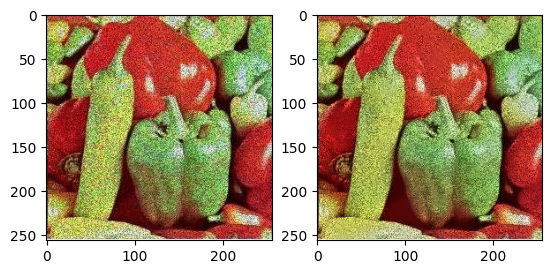

In [ ]:
img = cv.imread(imgNoiseFruit_path)
dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.show()

# BTVN

## Lý thuyết về  Noise

1. **Câu hỏi**: Uniform noise là gì? Khác biệt giữa uniform noise và Gaussian noise là gì?

2. **Câu hỏi**: Nêu một số ứng dụng thực tế của việc thêm noise vào dữ liệu hoặc ảnh trong lĩnh vực **Machine Learning** và **Computer Vision**.

---

**Phần 1.1: Thực hành trên Dữ liệu Số**

3. **Bài tập**: Sử dụng hàm gây nhiễu dữ liệu vừa được hướng dẫn ở trên  và thực hiện với ví dụ bên dưới

   **Ví dụ đầu vào**:
   ```python
   data = np.array([10, 20, 30, 40, 50])
   noisy_data = add_uniform_noise(data, noise_range=(-2, 2))
   print("Dữ liệu sau khi thêm nhiễu:", noisy_data)
   ```

   **Yêu cầu**:
   - Thực hiện chuẩn hóa mảng `data` về khoảng `[0, 1]` trước khi thêm nhiễu.
   - Đảm bảo giá trị của mảng sau khi thêm nhiễu vẫn nằm trong khoảng `[0, 1]`.

4. **Câu hỏi**: Thử nghiệm với các khoảng giá trị nhiễu khác nhau như `(-0.5, 0.5)` và `(-5, 10)`. Ghi lại quan sát của bạn về sự thay đổi của dữ liệu.

---

**Phần 1.1: Thực hành trên Ảnh**


5. **Bài tập mở rộng**:
    - Sử dụng ảnh bên ngoài và chạy với các giá trị tham số khác nhau của các hàm gây nhiễu vừa được hướng dẫn bên trên , sau đó vẽ histogram và rút ra nhận xét gì về ảnh ban đầu và ảnh nhiễu

6. **Câu hỏi**: Giải thích sự ảnh hưởng của nhiễu lên ảnh khi bạn thay đổi `noise_parameter`. Khi nào thì ảnh bị nhiễu quá mức đến mức không thể nhận dạng được? (bonus)

---




# Áp dụng bộ lọc tích chập và lọc ảnh

## Phần 1: Áp dụng các bộ lọc tích chập cơ bản
1. **Mục tiêu**: Áp dụng các bộ lọc làm mờ, phát hiện cạnh, và làm sắc nét để hiểu cách chúng thay đổi đặc điểm của ảnh.
2. **Yêu cầu**:
   - Tải một ảnh màu và chuyển nó thành ảnh grayscale (ảnh xám).
   - So sánh các ảnh đầu ra bằng cách hiển thị ảnh gốc và ảnh sau khi áp dụng từng bộ lọc.



## Phần 2: Bộ lọc Harmonic Mean và Geometric Mean

2. **Yêu cầu**:
   - Tạo một ảnh nhiễu Gaussian
   - Viết các hàm áp dụng bộ lọc Harmonic Mean và Geometric Mean.
   - Áp dụng các bộ lọc này với kích thước kernel khác nhau (3x3 và 5x5) sai đó so sánh kết quả và rút ra nhận xét.



## Bài tập mở rộng(bonus):
1. **Ứng dụng các bộ lọc trong thực tế**:
   - Áp dụng các bộ lọc tích chập trên một ảnh thực tế chứa văn bản và các chi tiết nhỏ để xem bộ lọc nào phù hợp nhất trong việc tăng cường hoặc giảm nhiễu mà vẫn giữ được các chi tiết quan trọng.
   

   
2. **So sánh bộ lọc**:
   - Đối với ảnh chứa nhiễu nặng, hãy thử so sánh hiệu quả của các bộ lọc khác nhau như Harmonic Mean, Geometric Mean, Convolutional filter
3. **Tìm hiểu về Hàm fastNlMeansDenoisingColored()**:
  - Nêu ý nghĩa các tham số của hàm
4. **Nêu ý kiến về sự khác biệt và giống nhau giữa 2 kỹ thuật denoise và filtering**?

